## 决策树模型

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('ccf_offline_stage1_train.csv', nrows = 200000)
df.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [7]:
df['Discount_rate']=df['Discount_rate'].fillna(0)
df['Discount_rate_new']=df['Discount_rate'].apply(lambda x:x if ':' not in str(x) else ((float(x.split(':')[0])-float(x.split(':')[1]))/float(x.split(':')[0])))
df['Discount_rate_new']=df['Discount_rate_new'].apply(lambda x:round(float(x),2))
from sklearn.model_selection import train_test_split
df['label']=df['Date'].apply(lambda x:1 if x==x else 0)
y=df['label']
X=df
df['label']=df['Date'].apply(lambda x:1 if x==x else 0)
y=df['label']
selected_features=['Merchant_id','Coupon_id','Discount_rate_new','Distance']
x_train,x_test,y_train,y_test=train_test_split(X.loc[:,selected_features].fillna(0),y,test_size=0.3,random_state=0)

In [8]:
from sklearn import tree 
from sklearn.metrics import log_loss, roc_auc_score, f1_score
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
clf.predict(x_test)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [12]:
clf.predict_proba(x_test)

array([[0.83817427, 0.16182573],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.87840384, 0.12159616],
       [0.87840384, 0.12159616],
       [0.        , 1.        ]])

In [13]:
print(log_loss(y_train, clf.predict_proba(x_train)))
# 查看训练集表现

print(log_loss(y_test, clf.predict_proba(x_test)))
# 查看验证集表现

0.1222241488702925
0.14706980477634649


In [14]:
y_pred = [x[1] for x in clf.predict_proba(x_test)]
roc_auc_score(y_test,y_pred)

0.9797679942983459

0.9797679942983459

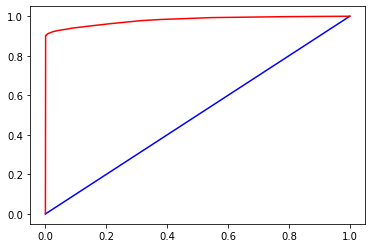

In [15]:
%matplotlib inline
from sklearn.metrics import roc_curve,auc
from matplotlib import pyplot as plt
fpr1,tpr1,thresholds1=roc_curve(y_test,clf.predict_proba(x_test)[:,1])
auc_socre=auc(fpr1,tpr1)
plt.plot([0,1],[0,1],'b')
plt.plot(fpr1,tpr1,'r')
auc_socre

#### GridSearchCV调参

In [17]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(tree.DecisionTreeClassifier(),
                    param_grid = {'max_depth':range(3,101)},
                    scoring='roc_auc')

grid.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(3, 101)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.9788101218062693
{'max_depth': 11}
